In [1]:
from __future__ import print_function
import argparse, os, sys, random, time, datetime
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, ShuffleSplit
#
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
# from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import SubsetRandomSampler, Sampler, Subset, ConcatDataset, random_split
#
from custom_models import *
from custom_datasets import *
from custom_transforms import *
from utils import *
import logging
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
path = '/mnt/Nami/rayeh/Med_AutoDO/local_data/med/exp4_allData/best_UNet_e200_opt_HES_est_True_aug_model_SEP_los_model_NONE_ir_1_sr_1.0_nr_0.0.pt'
pt = torch.load(path)

/home/rayeh/.conda/envs/autodo/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
augment_model = pt['augment_state_dict']['paramP'].cpu().clone().numpy()
augment_model = np.round(augment_model,1)
print(augment_model)


[[-3.8 -7.5 -0.5 ... -0.4 -3.  -0.6]
 [-2.5  3.2 -6.5 ... -7.8  0.3  0.2]
 [ 8.7 -0.2 -0.8 ...  5.4  0.7  1.5]
 ...
 [-3.9 -7.5 -6.2 ... -2.4  4.6 -2.6]
 [-4.3  0.3 -2.4 ... -7.  -2.9 -3.3]
 [-4.6 -7.2  2.  ...  5.  -6.4  3.6]]
15


[[ 0  1  2 ... 12 13 14]
 [ 0  1  2 ... 12 13 14]
 [ 0  1  2 ... 12 13 14]
 ...
 [ 0  1  2 ... 12 13 14]
 [ 0  1  2 ... 12 13 14]
 [ 0  1  2 ... 12 13 14]]
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [941 941 941 ... 941 941 941]
 [942 942 942 ... 942 942 942]
 [943 943 943 ... 943 943 943]]


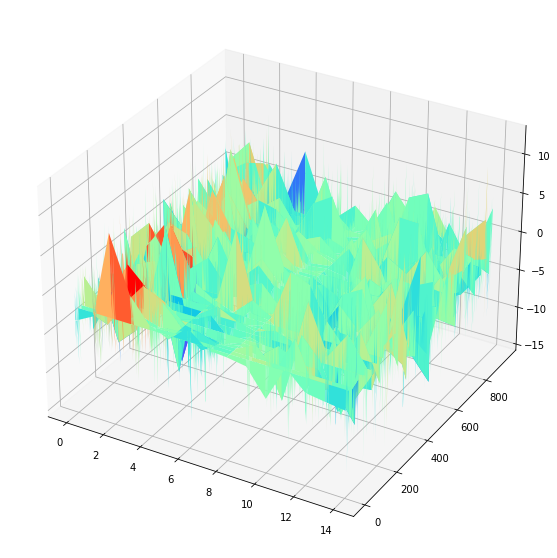

In [20]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
xx = np.arange(0,15)
yy = np.arange(0,np.shape(augment_model)[1])
X, Y = np.meshgrid(xx, yy)
# Z = np.sin(X)+np.cos(Y)
print(X)
print(Y)

#作图
ax.plot_surface(X,Y,augment_model.T,cmap='rainbow')
#ax3.contour(X,Y,Z, zdim='z',offset=-2，cmap='rainbow) 
plt.show()